#### Nama : Rahmatul Idami

#### NPM : 2108107010071

### Dataset
Dataset yang saya gunakan adalah dataset tentang Heart Attack Analysis & Prediction Dataset yang memiliki 13 fitur dan 1 label dengan banyak datanya adalah 303 data.

dataset ini diambil dari kaggle, berikut link dataset nya: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

fitur yang digunakan:
- usia (age)
- detak jantung maksimum yang dicapai (thalach)
- label (output) dimana label 1 yaitu lebih besar kemungkinan terkena serangan jantung dan label 0 yaitu lebih kecil kemungkinan terkena serangan jantung.

Pada tugas ini saya menggunakan model SVC untuk memprediksi kemungkinan serangan jantung berdasarkan fitur usia (age) dan detak jantung maksimum yang dicapai (thalach). Dengan memanfaatkan data pada dataset yang digunakan, saya dapat melatih model klasifikasi yang dapat memisahkan pasien berdasarkan fitur-fitur yang digunakan.

Dengan memanfaatkan model yang telah dilatih, kita dapat mengklasifikasikan pasien baru dan memberikan informasi yang berharga kepada dokter atau ahli kesehatan, sehingga mereka dapat mengambil tindakan pencegahan atau pengobatan yang sesuai dengan risiko yang diidentifikasi.


### Proses melatih dan menguji model SVC

In [1]:
#Impor perpustakaan yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
#Menampilkan dataset
dataset = pd.read_csv('Dataset/heart.csv')
dataset

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Menentukan fitur yang tidak diperlukan
fitur_tidak_diperlukan = ['trtbps', 'sex', 'cp', 'chol', 'fbs', 'restecg',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']

# Menghapus fitur yang tidak diperlukan dari DataFrame
df = dataset.drop(fitur_tidak_diperlukan, axis=1)

# Mengecek DataFrame setelah menghapus fitur
print(df)

     age  thalachh  output
0     63       150       1
1     37       187       1
2     41       172       1
3     56       178       1
4     57       163       1
..   ...       ...     ...
298   57       123       0
299   45       132       0
300   68       141       0
301   57       115       0
302   57       174       0

[303 rows x 3 columns]


In [4]:
# Menghitung jumlah nilai NaN di setiap kolom DataFrame
jumlah_nan_per_kolom = df.isna().sum()

# Menampilkan jumlah nilai NaN di setiap kolom
print(jumlah_nan_per_kolom)

age         0
thalachh    0
output      0
dtype: int64


1    165
0    138
Name: output, dtype: int64


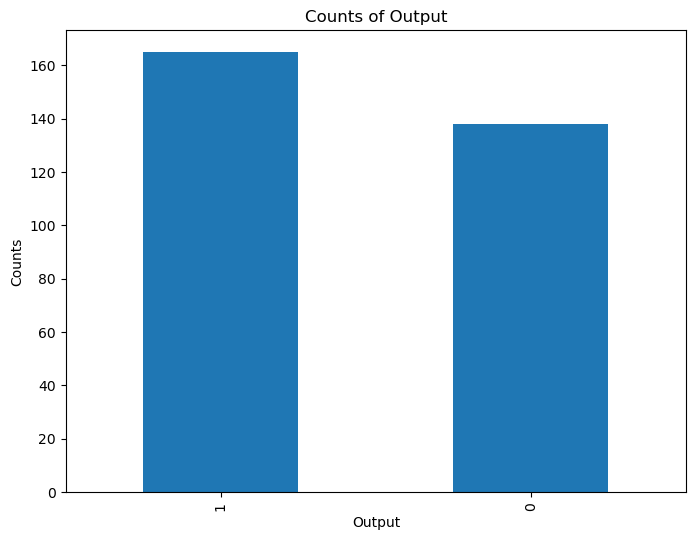

In [5]:
counts = dataset['output'].value_counts()
print(counts)

plt.figure(figsize=(8, 6))
counts.plot(kind='bar')
plt.xlabel('Output')
plt.ylabel('Counts')
plt.title('Counts of Output')
plt.show()

Dapat dilihat dari diagram diatas label 1 (lebih besar kemungkinan terkena serangan jantung) terdapat 165 pasien dan label 0 (lebih kecil kemungkinan terkena serangan jantung) terdapat 138 pasien.


In [6]:
#Identifikasi data dan labelnya (matriks X dan vektor Y)
X = df.iloc[:, [0, 1]].values
y = df.iloc[:, 2].values

#Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Kernel Linear

In [7]:
# Penskalaan Fitur
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Membangun Klasifikasi pada Data Pelatihan dengan kernel linear
classifier_linear = SVC(kernel='linear', random_state=0)
classifier_linear.fit(X_train, y_train)

# Memprediksi hasil Data Pengujian
y_pred_train_linear = classifier_linear.predict(X_train)
y_pred_test_linear = classifier_linear.predict(X_test)

# Membuat Matriks Confusion untuk data pelatihan
cm_train_linear = confusion_matrix(y_train, y_pred_train_linear)
print("Confusion Matrix (Data Pelatihan):")
print(cm_train_linear)

# Menghitung akurasi untuk data pelatihan
accuracy_train_linear = accuracy_score(y_train, y_pred_train_linear)
print("Akurasi (Data Pelatihan):", accuracy_train_linear)
print("Classification Report (Data Pelatihan):")
print(classification_report(y_train, y_pred_train_linear))

print("\n")

# Membuat Matriks Confusion untuk data pengujian
cm_test_linear = confusion_matrix(y_test, y_pred_test_linear)
print("Confusion Matrix (Data Pengujian):")
print(cm_test_linear)

# Menghitung akurasi untuk data pengujian
accuracy_test_linear = accuracy_score(y_test, y_pred_test_linear)
print("\nAkurasi (Data Pengujian):", accuracy_test_linear)
print("Classification Report (Data Pengujian):")
print(classification_report(y_test, y_pred_test_linear))


Confusion Matrix (Data Pelatihan):
[[66 39]
 [27 95]]
Akurasi (Data Pelatihan): 0.7092511013215859
Classification Report (Data Pelatihan):
              precision    recall  f1-score   support

           0       0.71      0.63      0.67       105
           1       0.71      0.78      0.74       122

    accuracy                           0.71       227
   macro avg       0.71      0.70      0.70       227
weighted avg       0.71      0.71      0.71       227



Confusion Matrix (Data Pengujian):
[[21 12]
 [ 9 34]]

Akurasi (Data Pengujian): 0.7236842105263158
Classification Report (Data Pengujian):
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        33
           1       0.74      0.79      0.76        43

    accuracy                           0.72        76
   macro avg       0.72      0.71      0.72        76
weighted avg       0.72      0.72      0.72        76



Dari hasil pelatihan model svc dengan kernel linear didapat akurasinya yaitu 0.7092511013215859, kemudian setelah dilakukan pengujian terhadap model menggunakan data uji didapat akurasinya 0.7236842105263158. Nilai akurasi mengalami kenaikan saat model diuji ini menunjukkan bahwa model cukup baik dalam memprediksi pada data yang baru.

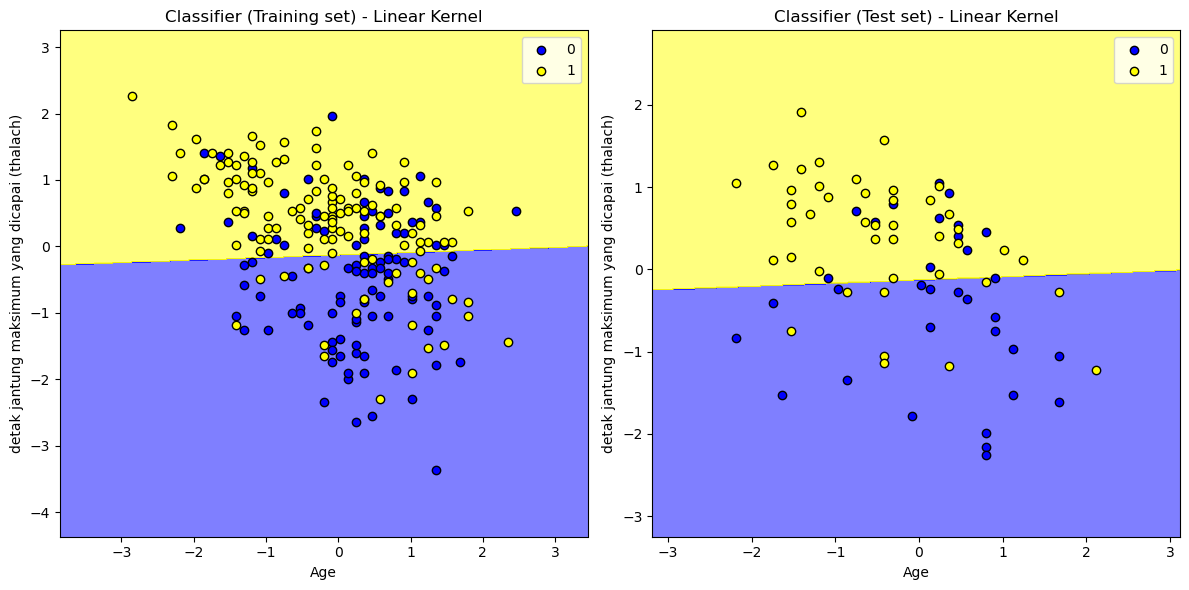

In [8]:
# Visualisasi training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier_linear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.5, cmap=ListedColormap(('blue', 'yellow')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('blue', 'yellow'))(i), edgecolor='black', label=j)
plt.title('Classifier (Training set) - Linear Kernel')
plt.xlabel('Age')
plt.ylabel('detak jantung maksimum yang dicapai (thalach)')
plt.legend()

# Visualisasi testing set
plt.subplot(1, 2, 2)
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier_linear.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.5, cmap=ListedColormap(('blue', 'yellow')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('blue', 'yellow'))(i), edgecolor='black', label=j)
plt.title('Classifier (Test set) - Linear Kernel')
plt.xlabel('Age')
plt.ylabel('detak jantung maksimum yang dicapai (thalach)')
plt.legend()

plt.tight_layout()
plt.show()

#### Kernel Non Linear (rbf)

In [9]:
# Penskalaan Fitur
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Membangun Klasifikasi pada Data Pelatihan dengan kernel non linear
classifier_rbf = SVC(kernel='rbf', random_state=0)
classifier_rbf.fit(X_train, y_train)

# Memprediksi hasil Data Pelatihan dan Pengujian
y_pred_train_rbf = classifier_rbf.predict(X_train)
y_pred_test_rbf = classifier_rbf.predict(X_test)

# Membuat Matriks Confusion untuk data pelatihan
cm_train_rbf = confusion_matrix(y_train, y_pred_train_rbf)
print("Confusion Matrix (Data Pelatihan):")
print(cm_train_rbf )

# Menghitung Akurasi untuk data pelatihan
accuracy_train_rbf = accuracy_score(y_train, y_pred_train_rbf)
print("Akurasi (Data Pelatihan):", accuracy_train_rbf)
print("Classification Report (Data Pelatihan):")
print(classification_report(y_train, y_pred_train_rbf))

print("\n")

# Membuat Matriks Confusion untuk data pengujian
cm_test_rbf = confusion_matrix(y_test, y_pred_test_rbf)
print("Confusion Matrix (Data Pengujian):")
print(cm_test_rbf)

# Menghitung Akurasi untuk data pengujian
accuracy_test_rbf = accuracy_score(y_test, y_pred_test_rbf)
print("Akurasi (Data Pengujian):", accuracy_test_rbf)
print("Classification Report (Data Pengujian):")
print(classification_report(y_test, y_pred_test_rbf))


Confusion Matrix (Data Pelatihan):
[[68 37]
 [32 90]]
Akurasi (Data Pelatihan): 0.6960352422907489
Classification Report (Data Pelatihan):
              precision    recall  f1-score   support

           0       0.68      0.65      0.66       105
           1       0.71      0.74      0.72       122

    accuracy                           0.70       227
   macro avg       0.69      0.69      0.69       227
weighted avg       0.70      0.70      0.70       227



Confusion Matrix (Data Pengujian):
[[20 13]
 [10 33]]
Akurasi (Data Pengujian): 0.6973684210526315
Classification Report (Data Pengujian):
              precision    recall  f1-score   support

           0       0.67      0.61      0.63        33
           1       0.72      0.77      0.74        43

    accuracy                           0.70        76
   macro avg       0.69      0.69      0.69        76
weighted avg       0.70      0.70      0.70        76



Dari hasil pelatihan model svc dengan kernel non linear didapat akurasinya yaitu 0.6960352422907489, kemudian setelah dilakukan pengujian terhadap model menggunakan data uji didapat akurasinya 0.6973684210526315. Akurasi mengalami peningkatan saat diuji walaupun cuman sedikit ini menunjukkan bahwa model cukup baik dalam memprediksi pada data yang baru.

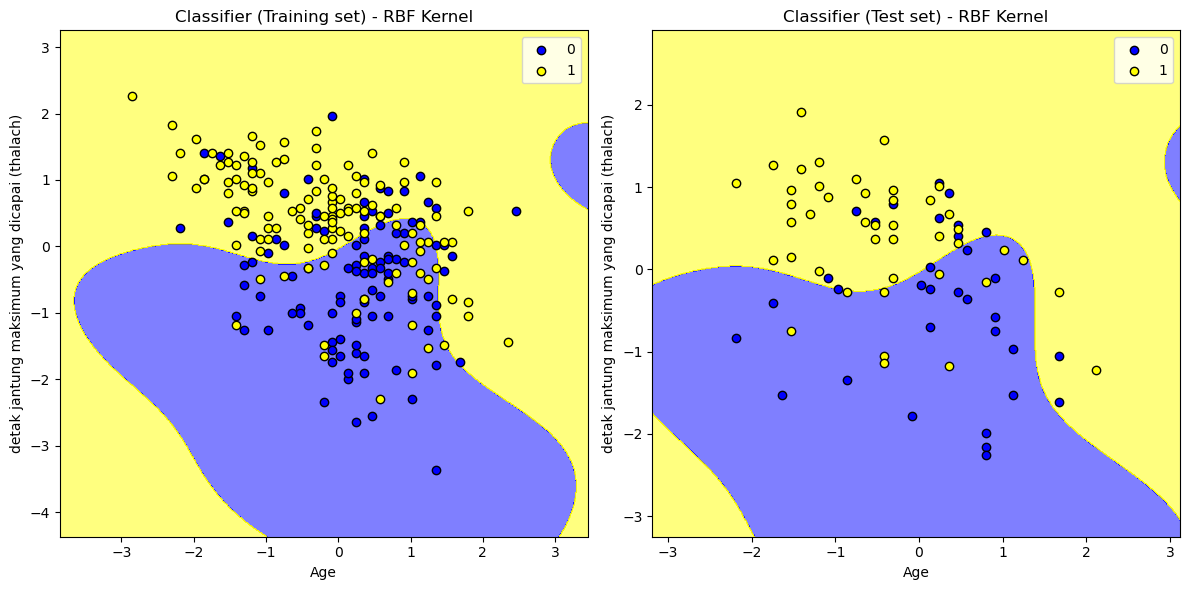

In [10]:
# Visualisasi Training set untuk RBF kernel
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier_rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.5, cmap=ListedColormap(('blue', 'yellow')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('blue', 'yellow'))(i), edgecolor='black', label=j)
plt.title('Classifier (Training set) - RBF Kernel')
plt.xlabel('Age')
plt.ylabel('detak jantung maksimum yang dicapai (thalach)')
plt.legend()

# Visualisasi Test set untuk RBF kernel
plt.subplot(1, 2, 2)
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier_rbf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.5, cmap=ListedColormap(('blue', 'yellow')))
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('blue', 'yellow'))(i), edgecolor='black', label=j)
plt.title('Classifier (Test set) - RBF Kernel')
plt.xlabel('Age')
plt.ylabel('detak jantung maksimum yang dicapai (thalach)')
plt.legend()

plt.tight_layout()
plt.show()


### Hasil:
Dari hasil pengujian menggunakan model SVC dengan kernel linear dan kernel non-linear(rbf) maka didapatkan bahwa akurasi menggunakan kernel linear lebih tinggi dari pada menggunakan kernel rbf. Namun karena akurasinya dibawah 99 persen model ini tidak bagus karena datasetnya berhubungan dengan kesehatan. Sehingga sangat beresiko untuk menggunakan model ini dalam kehidupan.